In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
import matplotlib.pyplot as plt
import random
import collections


In [3]:
#Load the labelled dataset and the test dataset
df = pd.read_csv("dataset1_processed.csv", header=None)
df_test = pd.read_csv("dataset1_test.csv", header=None)

names = ['age','workclass','fnlwgt','education','education-num','marital-status',
         'occupation','relationship','race',
         'sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
df.columns = names
print ("*** Dataset Processed for labelling***")
print (df.head())


*** Dataset Processed for labelling***
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse    Prof-speciality           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1  

In [4]:
names_test = ['age','workclass','fnlwgt','education','education-num','marital-status',
         'occupation','relationship','race',
         'sex','capital-gain','capital-loss','hours-per-week','native-country']
df_test.columns = names_test
print ("*** Unlabelled Testing Data Set***")
print (df_test.head())

*** Unlabelled Testing Data Set***
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   34    Private  198693          10th              6       Never-married   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black  Male             0             0   
1    Farming-fishing        Husband  White  Male             0             0   
2    Protective-serv        Husband  White  Male             0             0   
3  Machine-op-inspct        Husband  Black  Male          7688             0   
4      Other-service  Not-in-family  White  Male             0             0   

   hours-per-we

In [5]:
#Setting the feature and target variables
X = df.iloc[:,0:14]
y = df.iloc[:,-1]

#Merging the labelled and test dataset to cover for all values
df_merge = pd.concat([X,df_test])
print ("*** Dataset merged for One Hot Encoding as there might be some possibility of some extra values in test data. Hence \
       \ dataset was combined for preprocessing***")
print (df_merge.head())

*** Dataset merged for One Hot Encoding as there might be some possibility of some extra values in test data. Hence        \ dataset was combined for preprocessing***
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse    Prof-speciality           Wife  Black  Female   

   capital-gain

In [6]:
#Transformations were referred from https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
#Converting the categorical features to one or more binary columns for model to process
X_cat = list(df_merge.select_dtypes(include=['object']).columns)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])
df_merge_1 = categorical_transformer.fit_transform(df_merge)
X_1 = categorical_transformer.transform(X)
df_test_1 = categorical_transformer.transform(df_test)

print ("***Categorical features to one hot encoder for binomial columns***")
print (X_1)

***Categorical features to one hot encoder for binomial columns***
  (0, 22)	1.0
  (0, 79)	1.0
  (0, 3298)	1.0
  (0, 26831)	1.0
  (0, 26850)	1.0
  (0, 26858)	1.0
  (0, 26861)	1.0
  (0, 26878)	1.0
  (0, 26887)	1.0
  (0, 26889)	1.0
  (0, 26916)	1.0
  (0, 27011)	1.0
  (0, 27147)	1.0
  (0, 27242)	1.0
  (1, 33)	1.0
  (1, 78)	1.0
  (1, 3600)	1.0
  (1, 26831)	1.0
  (1, 26850)	1.0
  (1, 26856)	1.0
  (1, 26864)	1.0
  (1, 26877)	1.0
  (1, 26887)	1.0
  (1, 26889)	1.0
  (1, 26890)	1.0
  :	:
  (30160, 26833)	1.0
  (30160, 26846)	1.0
  (30160, 26858)	1.0
  (30160, 26861)	1.0
  (30160, 26880)	1.0
  (30160, 26887)	1.0
  (30160, 26889)	1.0
  (30160, 26890)	1.0
  (30160, 27011)	1.0
  (30160, 27127)	1.0
  (30160, 27242)	1.0
  (30161, 35)	1.0
  (30161, 77)	1.0
  (30161, 21957)	1.0
  (30161, 26833)	1.0
  (30161, 26846)	1.0
  (30161, 26856)	1.0
  (30161, 26864)	1.0
  (30161, 26882)	1.0
  (30161, 26887)	1.0
  (30161, 26888)	1.0
  (30161, 27000)	1.0
  (30161, 27011)	1.0
  (30161, 27147)	1.0
  (30161, 27242)	1

Question 1:
The categorical columns were converted using One Hot Encoder because it converts the categorical column into multiple binary columns based on each class in the column. This is better than assigning numbers to the column because numbers can sometimes be misinterpreted as assigning a rank to the values with lower number having a lower rank than the other higher numbers. Hence i converted the categorical columns to multiple binary columns. 
Also, earlier, I only fitted the training dataset, but when i was trying to transform the test dataset using the fitted training dataset, it was throwing error of mismatch in the feature columns between training and test dataset. Hence, i merged the training and test dataset to fit the pipeline, and then transformed both the training and test dataset on it. This way i was able to achieve the same number of features in both the datasets.

In [7]:
print ("***Testing Data Set categorical features transformed***")
print (df_test_1)

***Testing Data Set categorical features transformed***
  (0, 8)	1.0
  (0, 76)	1.0
  (0, 18200)	1.0
  (0, 26823)	1.0
  (0, 26844)	1.0
  (0, 26858)	1.0
  (0, 26867)	1.0
  (0, 26880)	1.0
  (0, 26885)	1.0
  (0, 26889)	1.0
  (0, 26890)	1.0
  (0, 27011)	1.0
  (0, 27147)	1.0
  (0, 27242)	1.0
  (1, 21)	1.0
  (1, 76)	1.0
  (1, 3994)	1.0
  (1, 26833)	1.0
  (1, 26846)	1.0
  (1, 26856)	1.0
  (1, 26865)	1.0
  (1, 26877)	1.0
  (1, 26887)	1.0
  (1, 26889)	1.0
  (1, 26890)	1.0
  :	:
  (15058, 26831)	1.0
  (15058, 26850)	1.0
  (15058, 26854)	1.0
  (15058, 26861)	1.0
  (15058, 26880)	1.0
  (15058, 26884)	1.0
  (15058, 26889)	1.0
  (15058, 26971)	1.0
  (15058, 27011)	1.0
  (15058, 27147)	1.0
  (15058, 27242)	1.0
  (15059, 18)	1.0
  (15059, 77)	1.0
  (15059, 13238)	1.0
  (15059, 26831)	1.0
  (15059, 26850)	1.0
  (15059, 26856)	1.0
  (15059, 26864)	1.0
  (15059, 26877)	1.0
  (15059, 26887)	1.0
  (15059, 26889)	1.0
  (15059, 26890)	1.0
  (15059, 27011)	1.0
  (15059, 27167)	1.0
  (15059, 27242)	1.0


In [8]:
#Scaling the numerical columns to bring them to a particular range for better accuracy
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_num = list(X.select_dtypes(include=numerics).columns)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))])
df_merge = numeric_transformer.fit_transform(df_merge_1)

print ("***Numerical features standardization for training set***")
X = numeric_transformer.transform(X_1)
print (X)


***Numerical features standardization for training set***
  (0, 22)	6.32806623825831
  (0, 79)	4.957116502134776
  (0, 3298)	212.65700087726626
  (0, 26831)	2.678599607722585
  (0, 26850)	2.678599607722585
  (0, 26858)	2.1388096157392744
  (0, 26861)	3.0681893324099914
  (0, 26878)	2.2833249055506335
  (0, 26887)	2.884257571546199
  (0, 26889)	2.135123040425787
  (0, 26916)	25.08156550173291
  (0, 27011)	4.709718507307852
  (0, 27147)	2.003077969143215
  (0, 27242)	3.549936062803053
  (1, 33)	7.467716471527641
  (1, 78)	3.627120741802755
  (1, 3600)	122.78029184825955
  (1, 26831)	2.678599607722585
  (1, 26850)	2.678599607722585
  (1, 26856)	2.0047525369668078
  (1, 26864)	2.967902491821477
  (1, 26877)	2.031153777890589
  (1, 26887)	2.884257571546199
  (1, 26889)	2.135123040425787
  (1, 26890)	3.608794994126416
  :	:
  (30160, 26833)	2.1318335215086797
  (30160, 26846)	2.1318335215086797
  (30160, 26858)	2.1388096157392744
  (30160, 26861)	3.0681893324099914
  (30160, 26880)	2.8278274

The numerical features were scaled to unit variance, for there to be a uniformity in the dataset. 

In [9]:
print ("***Testing Data Set numerical features transformed***")
df_test = numeric_transformer.transform(df_test_1)
print (df_test)

***Testing Data Set numerical features transformed***
  (0, 8)	6.42050194867354
  (0, 76)	2.2800377749221323
  (0, 18200)	212.65700087726626
  (0, 26823)	5.382303159231706
  (0, 26844)	5.382303159231706
  (0, 26858)	2.1388096157392744
  (0, 26867)	6.787086146115362
  (0, 26880)	2.827827418187307
  (0, 26885)	3.434963510687407
  (0, 26889)	2.135123040425787
  (0, 26890)	3.608794994126416
  (0, 27011)	4.709718507307852
  (0, 27147)	2.003077969143215
  (0, 27242)	3.549936062803053
  (1, 21)	6.214366544691014
  (1, 76)	2.2800377749221323
  (1, 3994)	212.65700087726626
  (1, 26833)	2.1318335215086797
  (1, 26846)	2.1318335215086797
  (1, 26856)	2.0047525369668078
  (1, 26865)	5.657502530314509
  (1, 26877)	2.031153777890589
  (1, 26887)	2.884257571546199
  (1, 26889)	2.135123040425787
  (1, 26890)	3.608794994126416
  :	:
  (15058, 26831)	2.678599607722585
  (15058, 26850)	2.678599607722585
  (15058, 26854)	2.8884749690516336
  (15058, 26861)	3.0681893324099914
  (15058, 26880)	2.82782741818

In [10]:
#Labelling the target class to binary variables
print ("***Labelling the target class***")
le = LabelEncoder()
y = le.fit_transform(y)

***Labelling the target class***


In [11]:
#Question 2
print ("***Split the preprocessed dataset to training and test dataset for model training and validation")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

***Split the preprocessed dataset to training and test dataset for model training and validation


In [20]:
#Question 3 - 3 models: Decision Tree Classifier, Logistic Regression and Random Forest
print ('*** Decision Tree Classifier ***')
clf_tree = DecisionTreeClassifier(max_depth = 55).fit(X_train,y_train)
tree_y_pred = clf_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_precision = precision_score(y_test,tree_y_pred,average="macro")
print ('Precision:', tree_precision )
print ('Accuracy:',tree_accuracy)

*** Decision Tree Classifier ***
Precision: 0.8029767288245155
Accuracy: 0.8464938718103275


In [13]:
print ('\n*** Logistic Regression ***')
clf_lr = LogisticRegression(multi_class = 'ovr', solver = 'liblinear').fit(X_train,y_train)
lr_y_pred = clf_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)
lr_precision = precision_score(y_test,lr_y_pred,average="macro")
print ('Precison:', lr_precision)
print ('Accuracy:',lr_accuracy)



*** Logistic Regression ***
Precison: 0.7720788199165813
Accuracy: 0.8247940526421539


In [14]:
print ('\n*** Random Forest Classifier ***')
clf_rf = RandomForestClassifier(n_estimators =95).fit(X_train, y_train)
rf_y_pred = clf_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred,average="macro")
print ('Precision:', rf_precision)
print ('Accuracy:',rf_accuracy)


*** Random Forest Classifier ***
Precision: 0.8189605636092872
Accuracy: 0.8493068113321278


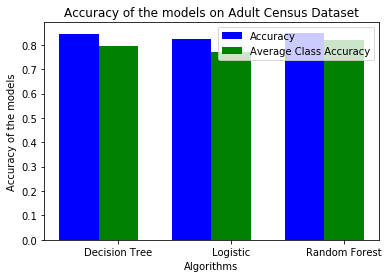

In [15]:
#This was referred from https://pythonspot.com/matplotlib-bar-chart/
import numpy as np
n_groups = 3
index = np.arange(n_groups)
model_accuracy = [tree_accuracy, lr_accuracy, rf_accuracy]
model_precision = [tree_precision, lr_precision,rf_precision]
fig, ax = plt.subplots()
bar_width = 0.35
p1 = plt.bar(index,model_accuracy, bar_width, color='b',label = "Accuracy")
p2 = plt.bar(index+bar_width, model_precision, bar_width, color='g', label="Average Class Accuracy")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy of the models")
plt.xticks(index + bar_width, ("Decision Tree", "Logistic", "Random Forest"))
plt.title("Accuracy of the models on Adult Census Dataset")
plt.legend()
plt.show()

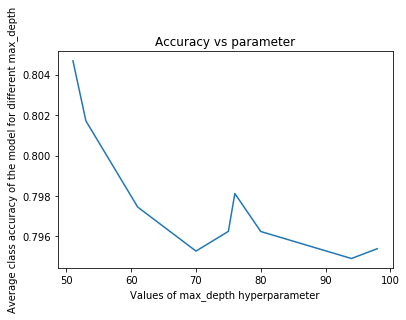

In [19]:
#Question 4
#variation of hyperparameter n_estimators to determine how it changes the average class accuracy
table = {}
for i in range(10):
    temp = random.randint(50,100)
    clf_tree_temp = DecisionTreeClassifier(max_depth = temp).fit(X_train,y_train)
    tree_y_pred = clf_tree_temp.predict(X_test)
    tree_precision = precision_score(y_test, tree_y_pred, average="macro")
    table[temp] = tree_precision

sorted_output = collections.OrderedDict(sorted(table.items()))


y = sorted_output.values()
x = sorted_output.keys()

plt.plot(x,y)
plt.xlabel("Values of max_depth hyperparameter")
plt.ylabel("Average class accuracy of the model for different max_depth")
plt.title("Accuracy vs parameter")
plt.show()

Question 5:
Based on the above graph, and after trying different combinations of the random numbers, it could be observed that the range around 50 generally gave the best results of average class accuracy.
But, the random forest gave the highest precision and accuracy amongst the three algorithms, and hence it was chosen to use to predict the unlabelled dataset.
The best configuration was yielded by trying multiple combinations of the hyperparameters in random forest and comparing the average class accuracy for the same.

In [21]:
#Question 6:
#predicting the output of test dataset using random forest classifier
test_rf_predict = clf_rf.predict(df_test)
pred_output = []
for i in test_rf_predict:
    if i == 0:
        pred_output.append("<=50K")
    else:
        pred_output.append(">50K")
print ("***Final output of the predicted class in the unlabelled dataset***")
pred_df = pd.DataFrame(pred_output, columns = ['Salary'])
pred_df.to_csv("B00809769_prediction.csv", header=False, index=False)

***Final output of the predicted class in the unlabelled dataset***
